In [80]:
# Import the full met.ie dataset (downloaded from https://www.met.ie/climate/available-data/historical-data)

import pandas as pd
import matplotlib.pyplot as plt


In [81]:
all_data_df = pd.read_csv("data/Athenry_met/hly1875.csv", skiprows=17)
# Adding a pandas datetime field 



In [85]:
all_data_df.columns.values

array(['date', 'ind', 'rain', 'ind.1', 'temp', 'ind.2', 'wetb', 'dewpt',
       'vappr', 'rhum', 'msl', 'ind.3', 'wdsp', 'ind.4', 'wddir'],
      dtype=object)

In [93]:
# set index to be datetime
all_data_df['datetime'] = pd.to_datetime(all_data_df['date'])
all_data_df = all_data_df.set_index(all_data_df['datetime'])
all_data_df.drop(columns=['date', 'datetime'], inplace=True)

In [94]:
# taking the data for 1 year only - 2021
year_start = "2021-01-01 00:00:00"
year_end = "2022-01-01 00:00:00"

data_2021_df = all_data_df.loc[year_start : year_end].copy()
data_2021_df



,ind,rain,ind.1,temp,ind.2,wetb,dewpt,vappr,rhum,msl,ind.3,wdsp,ind.4,wddir
datetime,,,,,,,,,,,,,,
2021-01-01 00:00:00,0,0.0,0,1.8,0,1.4,0.7,6.4,92,1016.2,2,8,2,300
2021-01-01 01:00:00,0,0.0,0,0.9,0,0.5,-0.1,6.1,93,1016.5,2,7,2,310
2021-01-01 02:00:00,0,0.0,0,0.5,0,0.2,-0.4,5.9,94,1016.9,2,5,2,280
2021-01-01 03:00:00,0,0.0,0,0.8,0,0.5,-0.1,6.1,93,1017.3,2,6,2,330
2021-01-01 04:00:00,0,0.0,0,0.9,0,0.6,0.0,6.1,94,1017.3,2,6,2,330
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-31 20:00:00,0,0.0,0,13.6,0,12.3,11.2,13.3,85,1004.8,2,10,2,140
2021-12-31 21:00:00,0,0.0,0,13.8,0,12.7,11.7,13.8,87,1003.5,2,12,2,160
2021-12-31 22:00:00,0,0.0,0,13.7,0,12.3,11.0,13.2,84,1002.1,2,13,2,160


In [97]:
# Some initial data investigation
# plot a histogram of rainfall for the year 2021
import numpy as np
#data_2021_df = data_2021_df.fillna(np.nan)
# replace blankspace with nan - https://stackoverflow.com/questions/13445241/replacing-blank-values-white-space-with-nan-in-pandas
data_2021_df = data_2021_df.replace(r'^\s+$', np.nan, regex=True)


#plt.hist(data_2021_df['rain'])


In [110]:
# Take 3 met variables - hourly rainfall, temperature, sealevel pressure
data_2021_df['rain'] = data_2021_df['rain'].astype(float)
data_2021_df['temp'] = data_2021_df['temp'].astype(float)
data_2021_df['msl'] = data_2021_df['msl'].astype(float)


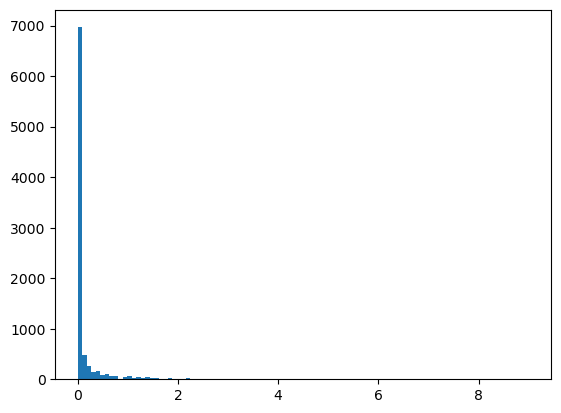

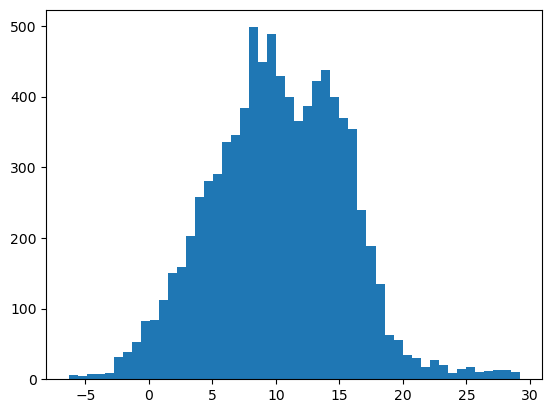

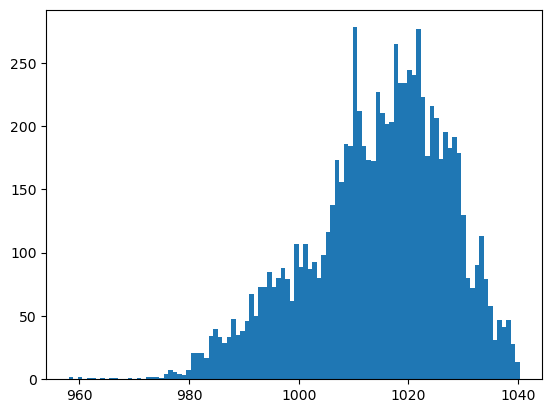

In [115]:
plt.hist(data_2021_df['rain'], bins=100)
plt.show()
plt.hist(data_2021_df['temp'], bins=50)
plt.show()
plt.hist(data_2021_df['msl'], bins=100)
plt.show()


- Histogram of data for rainfall in 2021 is highly skewed towards 0, so many hours where there is no rain (i.e., it's not raining all the time in Athenry!)
- Histogram of temperature for the year has 2 peaks (probably showing the seasonal moving of the average) - possibly 2 overlapping gaussian distributions.
- Histogram of pressure for the year shows a tail on the lower data

